In [1]:
%pip install kagglehub

  Using cached kagglehub-0.3.12-py3-none-any.whl.metadata (38 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached kagglehub-0.3.12-py3-none-any.whl (67 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Netflix Data set Analysis

In [4]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("divyaraj2006/netflix-tv-shows-and-movies")

for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\Administrator\.cache\kagglehub\datasets\divyaraj2006\netflix-tv-shows-and-movies\versions\1\Netflix.csv


In [3]:
import pandas as pd

In [6]:
file_path=r'C:\Users\Administrator\.cache\kagglehub\datasets\divyaraj2006\netflix-tv-shows-and-movies\versions\1\Netflix.csv'

In [7]:
nt_df=pd.read_csv(file_path)
nt_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
195,s196,Movie,EMI: Liya Hai To Chukana Padega,Saurabh Kabra,"Sanjay Dutt, Arjun Rampal, Malaika Arora, Aash...",India,27-Aug-21,2008,TV-14,128 min,"Comedies, Dramas, International Movies",A bank hires an enigmatic and unorthodox debt ...
196,s197,Movie,He's All That,Mark Waters,"Addison Rae, Tanner Buchanan, Rachael Leigh Co...",NaN,27-Aug-21,2021,TV-14,92 min,"Comedies, Romantic Movies",An influencer specializing in makeovers bets s...
197,s198,TV Show,I Heart Arlo,NaN,"Michael J. Woodard, Mary Lambert, Jonathan Van...",NaN,27-Aug-21,2021,TV-Y7,1 Season,"Kids' TV, TV Comedies",It's a whole new world for Arlo and his one-of...
198,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,27-Aug-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...


Objectives
1 Actors commonly featured
2. Dominating content
3.Countries with most content
4.When was content added the most

Data Understanding

In [14]:
nt_df.shape

(200, 12)

In [15]:
nt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       200 non-null    object
 1   type          200 non-null    object
 2   title         200 non-null    object
 3   director      137 non-null    object
 4   cast          180 non-null    object
 5   country       136 non-null    object
 6   date_added    200 non-null    object
 7   release_year  200 non-null    int64 
 8   rating        200 non-null    object
 9   duration      200 non-null    object
 10  listed_in     200 non-null    object
 11  description   200 non-null    object
dtypes: int64(1), object(11)
memory usage: 18.9+ KB


checking missing values

In [16]:
nt_df.isna().sum()

show_id          0
type             0
title            0
director        63
cast            20
country         64
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

Looking for Extrenous values

In [18]:
for col in nt_df.columns:
    print(col, '\n', nt_df[col].value_counts(normalize=True).head(), '\n\n')

show_id 
 show_id
s1    0.005
s2    0.005
s3    0.005
s4    0.005
s5    0.005
Name: proportion, dtype: float64 


type 
 type
Movie      0.635
TV Show    0.365
Name: proportion, dtype: float64 


title 
 title
Dick Johnson Is Dead     0.005
Blood & Water            0.005
Ganglands                0.005
Jailbirds New Orleans    0.005
Kota Factory             0.005
Name: proportion, dtype: float64 


director 
 director
Toshiya Shinohara           0.029197
Masahiko Murata             0.021898
Hajime Kamegaki             0.014599
Antoine Fuqua               0.014599
Chapman Way, Maclain Way    0.014599
Name: proportion, dtype: float64 


cast 
 cast
Vijay Sethupathi, Parthiban, Raashi Khanna                                                                                                                                                                                                                                                                         0.011111
Sami Bouajila, Tracy Gotoas, S

Checking duplicates

In [20]:
duplicates=nt_df.duplicated()
duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [26]:
duplicates=nt_df[nt_df.duplicated(subset='show_id')]
print(len(duplicates))

0


Data cleaning.
Columns with missing values
-director        63
-cast            20
-country         64

In [11]:
nt_df['director'].value_counts()

director
Toshiya Shinohara           4
Masahiko Murata             3
Hajime Kamegaki             2
Antoine Fuqua               2
Chapman Way, Maclain Way    2
                           ..
Taylor Sheridan             1
Sachin Yardi                1
Saurabh Kabra               1
Mark Waters                 1
Partho Mitra                1
Name: count, Length: 123, dtype: int64

In [29]:
nt_df['cast'].value_counts()

cast
Vijay Sethupathi, Parthiban, Raashi Khanna                                                                                                                                                                                                                                                                         2
Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera                                                                                                                                                                1
Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng    1
Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin L

In [30]:
nt_df['country'].value_counts()

country
United States                                                            50
India                                                                    15
Japan                                                                    14
United Kingdom                                                            5
Nigeria                                                                   4
United Kingdom, United States                                             4
Australia                                                                 3
France                                                                    2
United States, Canada                                                     2
South Korea                                                               2
Germany, United States                                                    2
United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia     1
China, Canada, United States                                              1
Finl

In [34]:
nt_df['country'].fillna('uknown')

0      United States
1       South Africa
2             uknown
3             uknown
4              India
           ...      
195            India
196           uknown
197           uknown
198          Nigeria
199            India
Name: country, Length: 200, dtype: object

In [35]:
nt_df['director'].fillna('unkwon')

0      Kirsten Johnson
1               unkwon
2      Julien Leclercq
3               unkwon
4               unkwon
            ...       
195      Saurabh Kabra
196        Mark Waters
197             unkwon
198       Kemi Adetiba
199       Partho Mitra
Name: director, Length: 200, dtype: object

In [37]:
nt_df['cast'].fillna('unknown')

0                                                unknown
1      Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2      Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                unknown
4      Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                             ...                        
195    Sanjay Dutt, Arjun Rampal, Malaika Arora, Aash...
196    Addison Rae, Tanner Buchanan, Rachael Leigh Co...
197    Michael J. Woodard, Mary Lambert, Jonathan Van...
198    Sola Sobowale, Toni Tones, Richard Mofe-Damijo...
199    Aftab Shivdasani, Natassha, Dipannita Sharma, ...
Name: cast, Length: 200, dtype: object

In [38]:
nt_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [45]:
nt_df['date_added']=pd.to_datetime(nt_df['date_added'])
nt_df['date_added']

0     2021-09-25
1     2021-09-24
2     2021-09-24
3     2021-09-24
4     2021-09-24
         ...    
195   2021-08-27
196   2021-08-27
197   2021-08-27
198   2021-08-27
199   2021-08-27
Name: date_added, Length: 200, dtype: datetime64[ns]

Explaratory data Analysis

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [78]:
nt_df.describe()

,date_added,release_year
count,200,200.000000
mean,2021-09-08 12:21:36,2012.230000
min,2021-08-27 00:00:00,1961.000000
25%,2021-09-01 00:00:00,2005.750000
50%,2021-09-07 00:00:00,2018.000000
75%,2021-09-15 00:00:00,2021.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,11.609089


Top countries

Text(0.5, 1.0, 'Top 10 country interms of content relaesing')

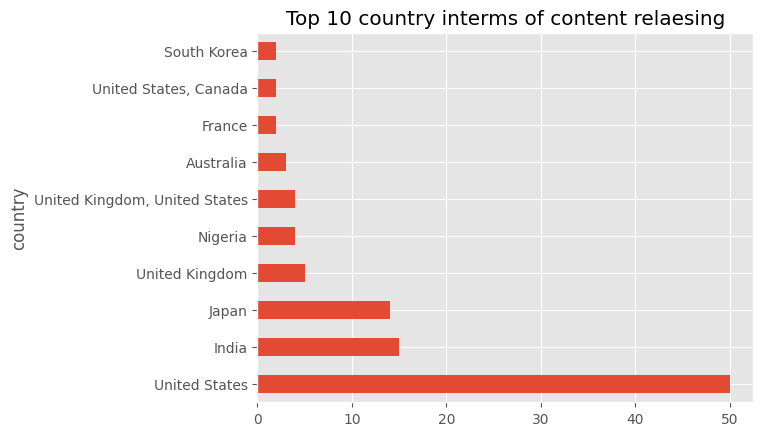

In [67]:
nt_df['country'].value_counts().head(10)\
.plot(kind='barh')
plt.title('Top 10 country interms of content relaesing')

When was content added the most

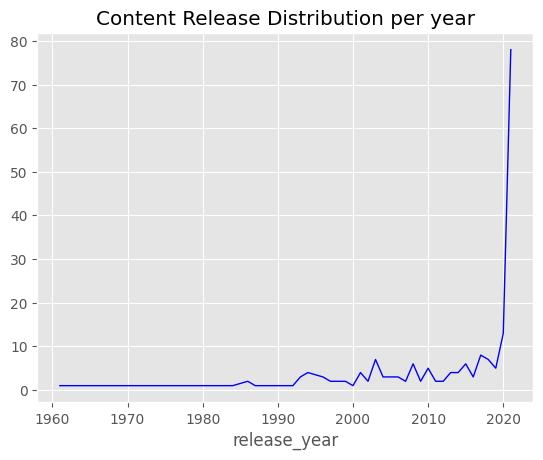

In [77]:
nt_df['release_year'].value_counts().sort_index().plot(linewidth=1,color='blue')
plt.title('Content Release Distribution per year')
plt.show()

Dominating content

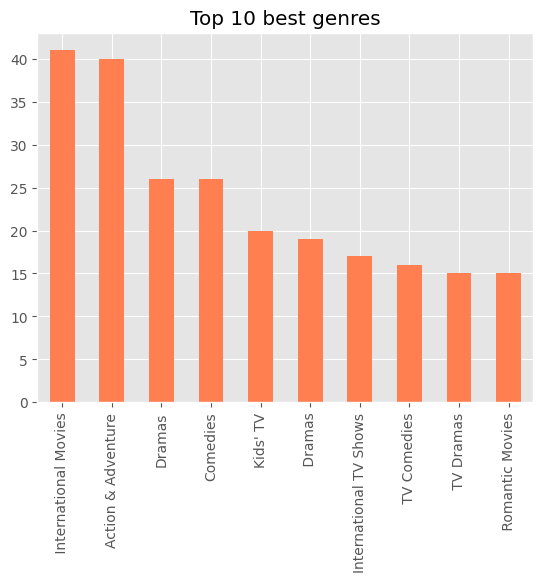

In [76]:
genres=nt_df['listed_in'].dropna().str.split(',')
genres_pe=[c for sublist in genres for c in sublist]
pd.Series(genres_pe).value_counts().head(10)\
.plot(kind='bar',color='coral')
plt.title('Top 10 best genres')
plt.show()

Actors that were the most appearing (the top 10)

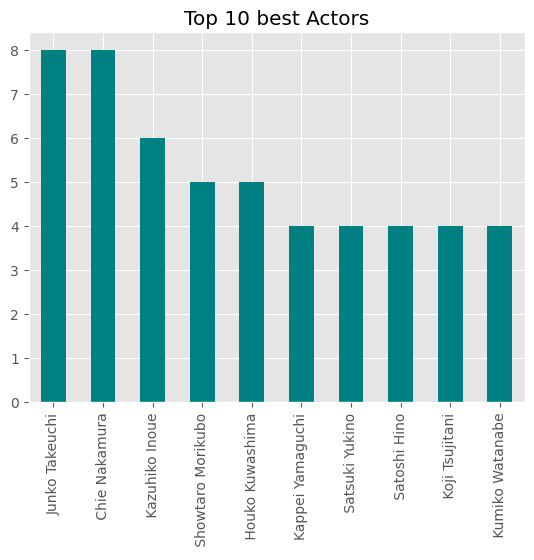

In [70]:
actors=nt_df['cast'].dropna().str.split(',')
actors_pe=[x for sublist in actors for x in sublist]
pd.Series(actors_pe).value_counts().head(10)\
.plot(kind='bar',color='teal')
plt.title('Top 10 best Actors')
plt.show()

Conclusion
-USA produces the most number of contents
-International movies and action moveis are in high demand
-New generaion movies released as from 2020 are viewd at a high rate
-There are no that very dominant actors

Recomendations
-Look into and produce more of action and adventure movies
-Geographical balance